In [8]:
# The goal of this task is to create an ML pipeline that could be used to predict whether a peptide sequence could be used to predict if it is an epitope, or not.

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# import dataset
bcell = pd.read_csv('input_bcell.csv')
sars = pd.read_csv('input_sars.csv')

In [11]:
bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [12]:
sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [13]:
# merge the two datasets bcell, and sars
merged = pd.concat([bcell, sars], ignore_index = True)

In [14]:
merged.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [15]:
# Get information on the data
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14907 non-null  object 
 1   protein_seq          14907 non-null  object 
 2   start_position       14907 non-null  int64  
 3   end_position         14907 non-null  int64  
 4   peptide_seq          14907 non-null  object 
 5   chou_fasman          14907 non-null  float64
 6   emini                14907 non-null  float64
 7   kolaskar_tongaonkar  14907 non-null  float64
 8   parker               14907 non-null  float64
 9   isoelectric_point    14907 non-null  float64
 10  aromaticity          14907 non-null  float64
 11  hydrophobicity       14907 non-null  float64
 12  stability            14907 non-null  float64
 13  target               14907 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.6+ MB


In [16]:
# check for any null values
merged.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [17]:
# Apply summary statistics, rounded to two s.f
merged.describe().round(2)

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14907.00,14907.00,14907.00,14907.00,14907.00,14907.00,14907.00,14907.00,14907.00,14907.00,14907.00
mean,308.85,319.52,0.99,1.08,1.02,1.75,7.02,0.08,-0.39,43.34,0.27
std,358.43,358.65,0.12,1.83,0.05,1.95,1.88,0.03,0.39,16.50,0.44
min,1.00,6.00,0.53,0.00,0.84,-9.03,3.69,0.00,-1.97,5.45,0.00
25%,86.00,96.00,0.91,0.24,0.99,0.60,5.57,0.06,-0.60,31.73,0.00
50%,197.00,208.00,0.99,0.55,1.02,1.78,6.45,0.08,-0.32,41.95,0.00
75%,400.00,411.00,1.07,1.21,1.06,2.96,8.68,0.09,-0.19,49.10,1.00
max,3079.00,3086.00,1.55,40.60,1.25,9.12,12.23,0.18,1.27,137.05,1.00


In [18]:
# create visualisations
# prepare columns
columns = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']

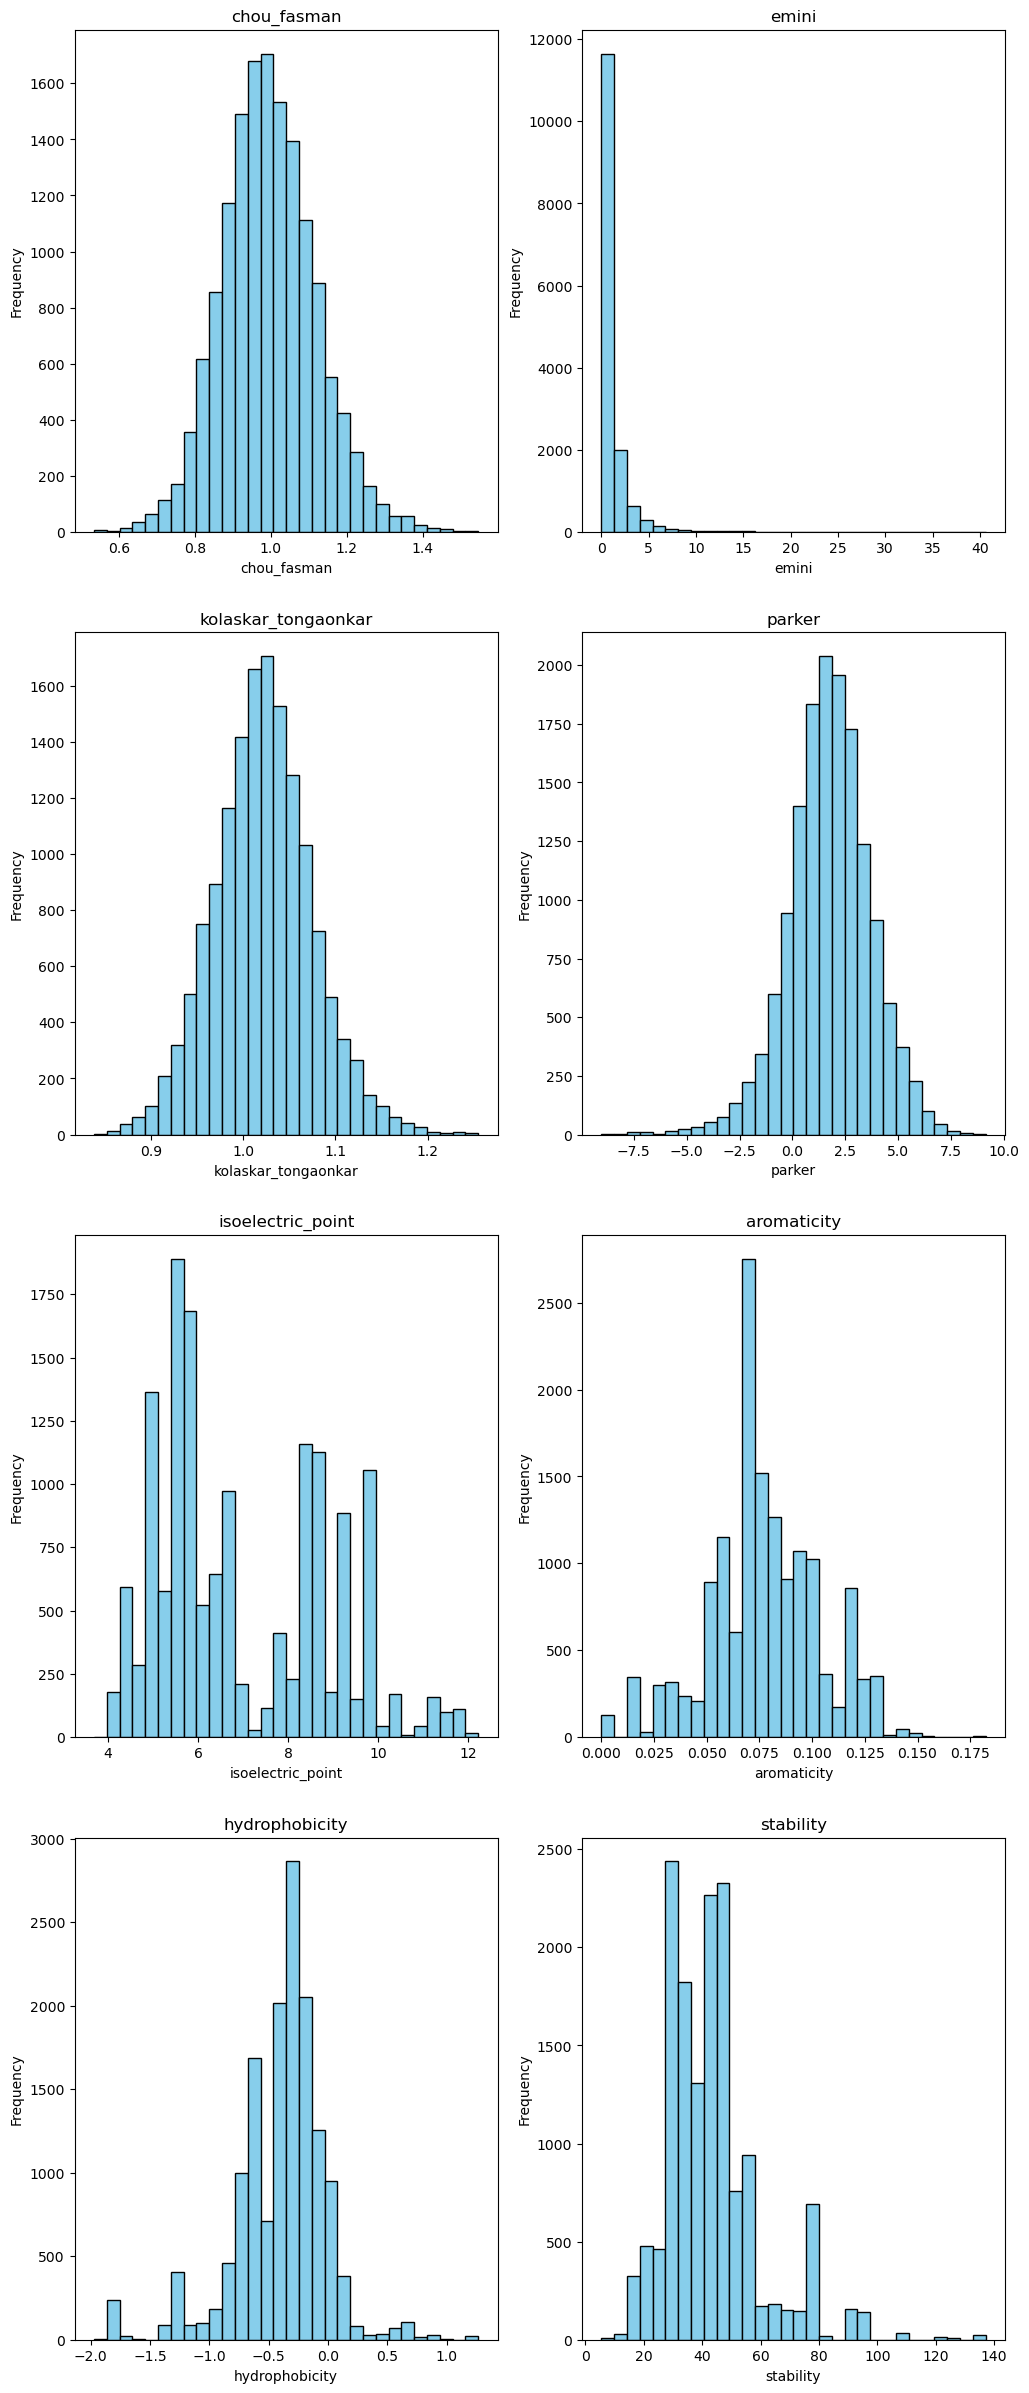

In [19]:
# prepare figure canvas
fig, axes = plt.subplots(4,2, figsize = (12, 30))
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].hist(merged[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# save image
# plt.savefig('histograms', dpi=300, bbox_inches='tight')

In [ ]:
# The above histogram is plotted to show the distribution of each of the B-cell features

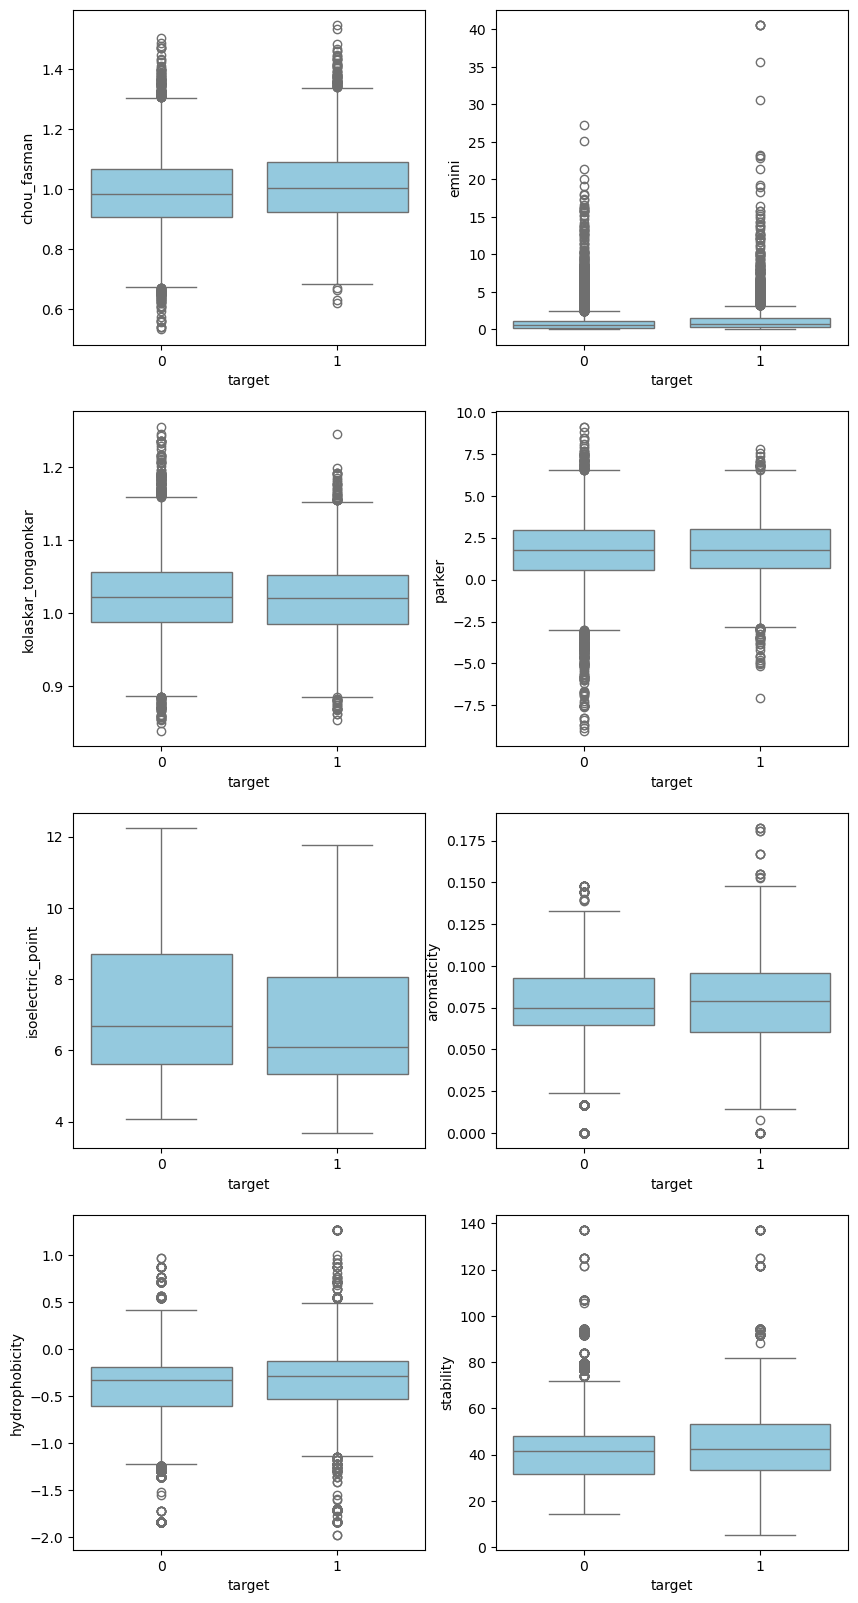

In [20]:
# create boxplots to visualise relations between 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability', and epitopes
fig, axes = plt.subplots(4, 2, figsize = (10, 20))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(data = merged, x = 'target', y = col, ax = axes[i], color = 'skyblue')

# save image
# plt.savefig('boxplots', dpi = 300, bbox_inches = 'tight')

In [ ]:
# The above boxplot was plotted to get a visual understanding of how target affects the quartiles.
# Many of these features overlap, which could make it difficult for the ML model to underperform.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

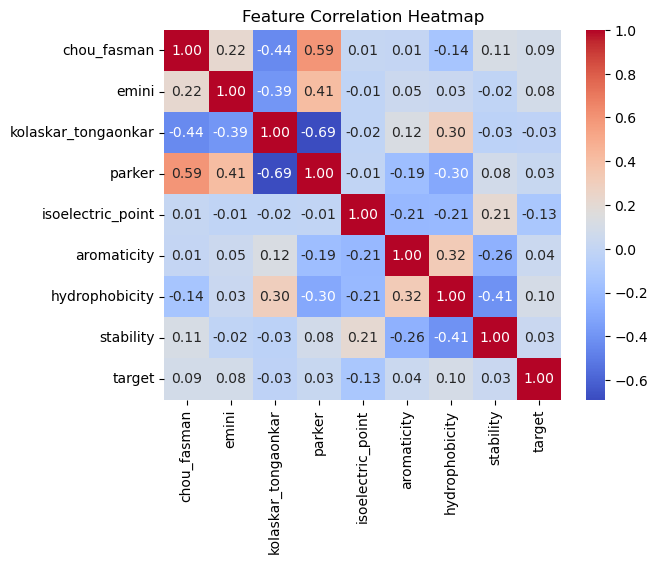

In [21]:
# creating a heatmap to visualise correlations
# first we need to use numeric values in our data-frame
numeric_columns = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability', 'target']
corr = merged[numeric_columns].corr() # this is done to minimise the processing time, since the data-frame 'merged' has over 14,000 values.
sns.heatmap(data = corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")

# save image
# plt.savefig('heatmap', dpi = 300, bbox_inches = 'tight')

In [22]:
# from the heatmap we can notice that there is a weak positive correlation between the chou_fasman value, and the parker value (+0.59)
# there is a strong negative correlation between the kolaskar_tongaonkar value, and the parker value (-0.69)

<Axes: xlabel='parker', ylabel='kolaskar_tongaonkar'>

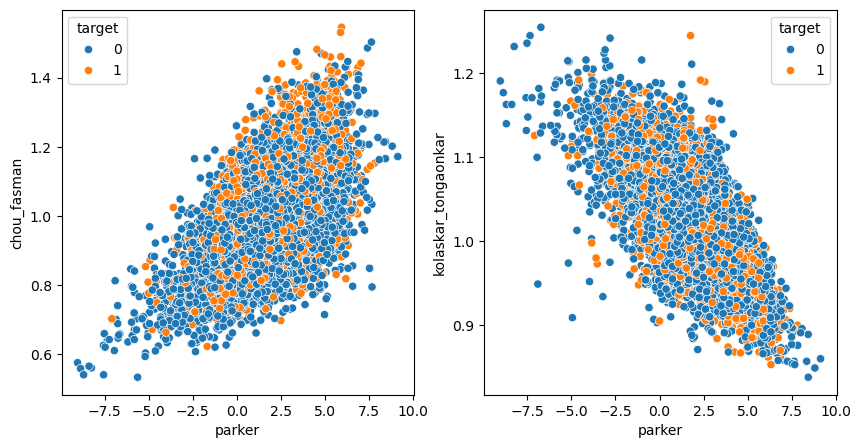

In [23]:
# create a scatter plot to visualise this relationship
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.scatterplot(data = merged, x = 'parker', y = 'chou_fasman', hue = 'target', ax = axes[0])
sns.scatterplot(data = merged, x = 'parker', y = 'kolaskar_tongaonkar', hue = 'target', ax = axes[1])

# save figure
# plt.savefig('scatterplot01', dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Distribution of targets')

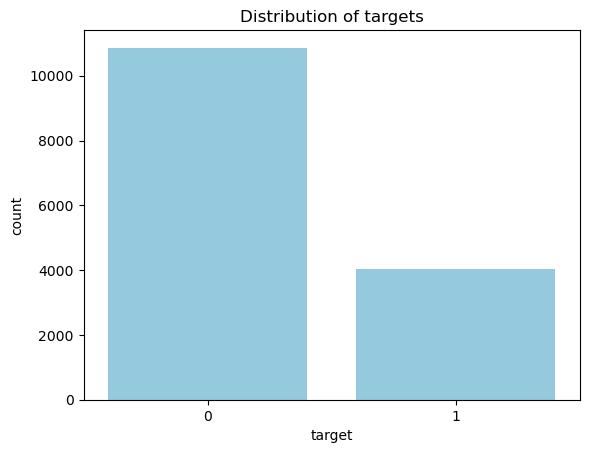

In [24]:
sns.countplot(data = merged, x = merged['target'], color = 'skyblue')
plt.title("Distribution of targets")
# plt.savefig('distrubtionOfTargets', dpi = 300, bbox_inches = 'tight')

In [25]:
merged['target'].value_counts()

target
0    10865
1     4042
Name: count, dtype: int64

In [26]:
# the dataset is unbalanced, with majority being non-epitopes (0).
# when preparing ML pipeline, the data must be balanced

In [27]:
# Creating machine-learning pipeline

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
# preparing dataset for ML pipeline
features = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']
x = merged[features]
y = merged['target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5, stratify = y)

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
model_logreg = LogisticRegression(class_weight = 'balanced')
model_logreg.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [33]:
# Test set predictions
y_pred = model_logreg.predict(x_test_scaled)

In [52]:
# evaluating accuracy 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.81      0.58      0.67      2173
           1       0.36      0.63      0.46       809

    accuracy                           0.59      2982
   macro avg       0.58      0.60      0.56      2982
weighted avg       0.68      0.59      0.61      2982

[[1255  918]
 [ 300  509]]


In [36]:
# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)

In [38]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# 2. Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(cm)

Decision Tree Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2173
           1       0.62      0.59      0.61       809

    accuracy                           0.79      2982
   macro avg       0.74      0.73      0.73      2982
weighted avg       0.79      0.79      0.79      2982


Confusion Matrix:
[[1879  294]
 [ 329  480]]


In [39]:
# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 300, max_depth = None, class_weight = 'balanced', random_state = 10, n_jobs = -1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [41]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# 2. Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm)

Decision Tree Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2173
           1       0.76      0.61      0.67       809

    accuracy                           0.84      2982
   macro avg       0.81      0.77      0.78      2982
weighted avg       0.83      0.84      0.83      2982


Confusion Matrix:
[[2016  157]
 [ 319  490]]


In [42]:
# Preparing a Reciever Operator Characteristic Curve

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
models = {'Logistic Regression': model_logreg, 'Decision Tree': model_dt, 'Random Forest': model_rf}

C:\Users\RayedAzwer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


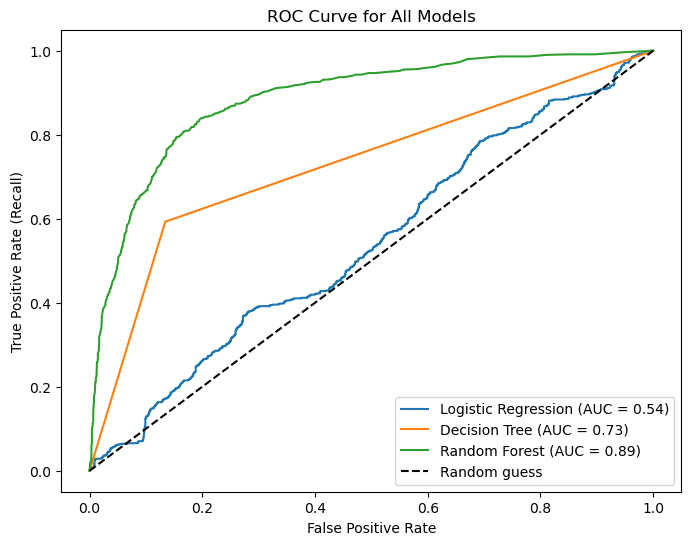

In [51]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    # Get probability predictions for class 1
    y_prob = model.predict_proba(x_test)[:, 1]
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # AUC
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Plot curve
    plt.plot(fpr, tpr, label = f'{name} (AUC = {auc_score:.2f})')

# Plot random guess line
plt.plot([0,1], [0,1], 'k--', label = 'Random guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for All Models')
plt.legend()

plt.savefig('ROCCurveForModels_Fixed', dpi = 300, bbox_inches = 'tight')

In [45]:
# export the ML Pipeline
import joblib

In [53]:
joblib.dump(model_logreg, 'model_logreg.pkl')
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(model_dt, 'model_dt.pkl')
joblib.dump(scaler, 'scaler.pkl') # standard scaler was used, very important that this is also exported

['scaler.pkl']

In [1]:
# Testing ML pipeline
# User inputs protein sequence to assess if it is an epitope (1), or non-epitope (0)

In [66]:
import numpy as np
import joblib# Load heuristic CSV
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [58]:
heuristics_df = pd.read_csv('peptide_features.csv', index_col=0)  # index = amino_acid

In [59]:
heuristics_df.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point
amino_acid,,,,,
A,0.66,0.49,1.064,2.1,6.11
C,1.19,0.26,1.412,1.4,5.15
D,1.46,0.81,0.866,10.0,2.98
E,0.74,0.84,0.851,7.8,3.08
F,0.60,0.42,1.091,-9.2,5.76


In [60]:
# Load ML models
# model_logreg = joblib.load('model_logreg.pkl')
model_dt = joblib.load('model_dt.pkl')
model_rf = joblib.load('model_rf.pkl')

In [61]:
# Validate sequence
def validate_sequence(seq):
    seq = seq.upper()
    valid_amino_acid = set('ACDEFGHIKLMNPQRSTVWY') # this ensures that user inputted sequence has any of the following characters
    if not set(seq).issubset(valid_amino_acid):
        raise ValueError("Sequence contains invalid amino acids")
    return seq

In [62]:
# Compute heuristic averages
def compute_heuristics(seq):
    values = {}
    for feature in heuristics_df.columns:
        vals = [heuristics_df.at[amino_acid, feature] for amino_acid in seq]
        values[feature] = np.mean(vals)
    return values

In [63]:
# Compute biopython features
def compute_biopython_features(seq):
    prot = ProteinAnalysis(seq)
    features = {
        'isoelectric_point': prot.isoelectric_point(),
        'aromaticity': prot.aromaticity(),
        'hydrophobicity': prot.gravy(),  # Kyte-Doolittle average
        'stability': prot.instability_index()
    }
    return features

In [72]:
# Main prediction function
def predict_epitope(seq):
    seq = validate_sequence(seq)
    data = {}
    data.update(compute_heuristics(seq))
    data.update(compute_biopython_features(seq))
    X = pd.DataFrame([data])  # single-row dataframe
    # Get predictions
    # pred_logreg = model_logreg.predict(X)[0]
    pred_dt = model_dt.predict(X)[0]
    pred_rf = model_rf.predict(X)[0]
    return {'DecisionTree': pred_dt, 'RandomForest': pred_rf}

In [2]:
# To make functional, remove '#' from the last three lines of code.
# sequence = input("Enter protein sequence: ")
# result = predict_epitope(sequence)
# print("Predictions:", result)